In [3]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'


In [4]:
# 读取文件的第一行
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
# 使用python内置模块json讲json字符串转换成python字典对象
import json
records = [json.loads(line) for line in open(path)]  # 列表推倒

In [5]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

u'America/New_York'

In [8]:
# 查出数据集中最常出现的时区（tz字段）
time_zones = [rec for rec in records]

In [9]:
time_zones['tz']

TypeError: list indices must be integers, not str

In [10]:
# 不是所有记录都有时区字段， 所以需要判断
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [11]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [12]:
# 对时区进行计数
# 原始python函数写法
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] =1
    return counts

# 使用Python标准库
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # 所有值均会被初始化为0
    for x in sequence:
        counts[x] +=1
    return counts

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

In [16]:
# 获得前10位的时区及其计数值
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [17]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [18]:
# 用pandas对时区进行计数
from pandas import DataFrame, Series

In [19]:
import pandas as pd
import numpy as np

In [20]:
frame = DataFrame(records)

In [21]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [22]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [23]:
tz_counts = frame['tz'].value_counts()

In [24]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
# 利用会图库给这段数据生成一张图片
# 首先先给记录中未知缺失的时区填上一个替代值， fillna函数可以替换缺失值（NA），未知值（空字符串）可以通过布尔型数组索引加以替换
clean_tz = frame['tz'].fillna("Missing")

In [26]:
clean_tz[clean_tz == ''] = 'Unknown'

In [27]:
tz_counts = clean_tz.value_counts()

In [43]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

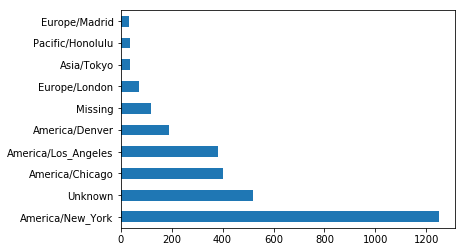

In [30]:
# 利用counts对象的plot方法可以得到一条水平条形图
%matplotlib inline   # 加上此句才能在内部显示图片
tz_counts[:10].plot(kind='barh', rot = 0)

In [31]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [32]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [33]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [36]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [37]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [38]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [39]:
# 按windows和非windows用户对时区统计信息进行分解
# 去除agent缺失的数据
cframe = frame[frame.a.notnull()]

In [40]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')

In [41]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [42]:
# 对列表进行分组
by_tz_os = cframe.groupby(['tz', operating_system])

In [47]:
# 利用unstack对计数结果进行重塑
agg_counts = by_tz_os.size().unstack().fillna(0)
# agg_counts = by_tz_os.size().fillna(0)

In [48]:
agg_counts[0:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [49]:
# pandas 数据重塑 资料见http://www.jianshu.com/p/4e443a852623
# 选取最常出现的时区， 为此，根据agge_counts中的行数构造一个间接索引数组
indexer = agg_counts.sum(1).argsort()
#平时用的sum应该是默认的axis=0 就是普通的相加，当加入axis=1以后就是将一个矩阵的每一行向量相加。
# argsort()返回所在元素按从小打到排序（默认按行）的顺序索引, 0是按列，1是按行，默认是1

In [50]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [62]:
# sum()测试， argsort()测试
c = np.array([[0, 2, 1], [3, 5, 6], [0, 1, 1]])
# print c.argsort(1)
# print c.sum()

[[0 2 1]
 [0 1 2]
 [0 1 2]]


In [63]:
count_subset = agg_counts.take(indexer)[-10:]
# take() 函数介绍https://docs.scipy.org/doc/numpy/reference/generated/numpy.take.html

In [64]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


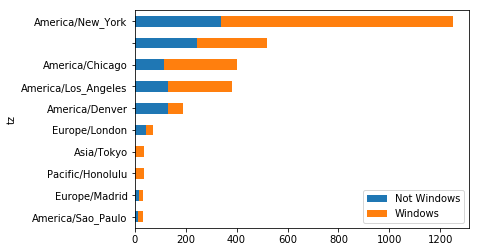

In [65]:
# 使用stacked=Treu生成一张堆积条形图
count_subset.plot(kind ='barh', stacked=True)

In [66]:
# 上述图不太容易看清楚小分组中Windows用户的相对比例，因此可以将各行规范化为“总计为1”
normed_subset = count_subset.div(count_subset.sum(1), axis=0)  #每一行除以总数,求出百分比

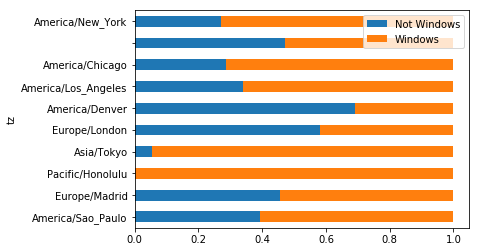

In [67]:
normed_subset.plot(kind='barh', stacked=True)

In [68]:
# MovieLends 1M 数据集 测试
import pandas as pd

In [71]:
unames = ['user_id', 'gender','age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None, names = unames)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [72]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names = rnames)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [73]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names = mnames)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [74]:
# 验证数据加载是否正确
users[:5]
# 注意，年龄和职业是以编码形式给出的，具体含义需要参考文件

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [75]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [76]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [78]:
# 假设我们想要根据性别和年龄计算某部电影的平均得分先用pandas的merge函数将ratings跟users合并到一起，
# 然后再将movies也合并进去，pandas会根据列明的重叠情况判断出哪些列是合并键
data = pd.merge(pd.merge(ratings, users), movies)

In [79]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [82]:
# pandas 按x轴取（行），ix[0]代表取第一行
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [86]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
# 此处书中有参数错误， 版本原因。
# rows改为index，cols改为columns

In [87]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [88]:
# 过滤掉评分数据不足250条的电影
# 先对title进行分组，然后利用size()得到一个含有各电影分组大小的Series对象
ratings_by_title = data.groupby('title').size()

In [89]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [90]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [91]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [93]:
mean_ratings = mean_ratings.ix[active_titles]

In [94]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [95]:
# 了解女性观众最喜欢的电影，对F进行降序排列
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [96]:
top_female_ratings[0:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [97]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [99]:
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## 计算评分分歧

### 找出男性和女性观众分歧最大的电影，一个办法是给mean-ratings加上一个用于存放平均得分之差的列，并排序

In [100]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [104]:
# 按diff排序
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [105]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [106]:
# 对结果反序并取出前15行，得到的是男性观众更喜欢的电影

In [108]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


### 只是想要找出分歧最大的电影，不考虑性别因素，则可以计算得分数据的方差或标准差

In [109]:
# 根据电影名称分组的得分数据的标准差
rating_std_by_title = data.groupby('title')['rating'].std()

In [110]:
# 根据active_titles进行过滤
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [112]:
# 根据值对Series进行降序排列
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 1880-2010年间全美婴儿姓名

In [114]:
# 由于是一个非常标准的以逗号隔开的格式，所以可以用pandas.read_csv讲其加载到DataFrame中
import pandas as pd

In [115]:
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])

In [116]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [121]:
# 文件中仅含有当前出现超过5次的名字。可以用births列的sex分组小计表示该年度的births总计：
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

#### 由于该数据集按年度被分割成了多个文件，所以先要将所有数据都组装到一个DataFrame里面，并加上一个year字段，使用pandas.concat即可做到

In [122]:
# 2010是目前最后一个有效统计年度
years = range(1880, 2011)

In [125]:
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 将所有数据整合到单个DataFrame中
# 必须指定ignore_index=True, 忽略数据里的原始行号
# concat默认按行将多个DataFrame组合到一起
names = pd.concat(pieces, ignore_index=True)

In [126]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [131]:
# 可以用groupby或pivot_table进行聚合
total_births = names.pivot_table('births', index='year', columns='sex',aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


In [129]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


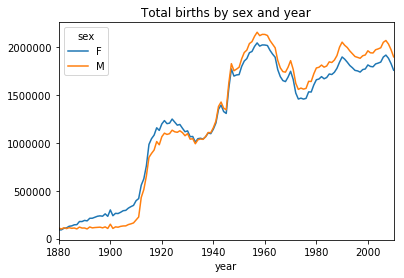

In [130]:
total_births.plot(title='Total births by sex and year')

In [134]:
# 插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例
# 例如prop值为0.02表示每100名婴儿中有2名取了当前的这个名字
# 先按year和sex分组，然后再将新列加到各个分组上
def add_prop(group):
    # 整数除法会向下圆整
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group 

names = names.groupby(['year', 'sex']).apply(add_prop)

In [135]:
# 由于births是整数，所以我们在计算分式时必须将分子或分母转换成浮点数（Python3不需要）
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [136]:
# 在做这样的分组处理时，一般都要做一些有效性检查，比如验证所有分组的prop的总和是否为1.
# 由于是浮点数，所以使用np.allclose来检查这个分组总和是否足够接近1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [137]:
# 取一个子集：每对sex/year组合的前1000个名字，这是一个分组操作
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [139]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
    

In [140]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## 分析命名趋势

In [142]:
boys = top1000[top1000.sex == 'M']

In [143]:
girls = top1000[top1000.sex == 'F']

In [147]:
# 生成一张按year和name统计的总出生数透视表
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [145]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014AF47F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A276438>], dtype=object)

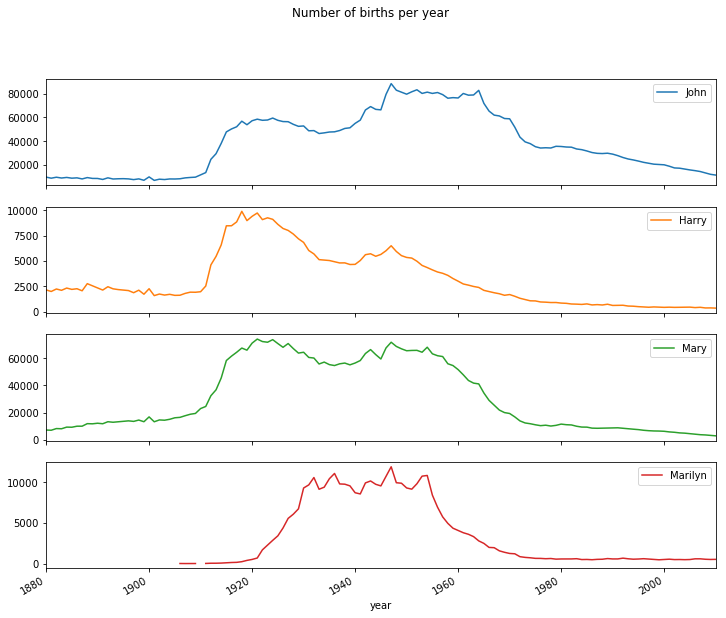

In [148]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

### 评估命名多样性的增长

In [149]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

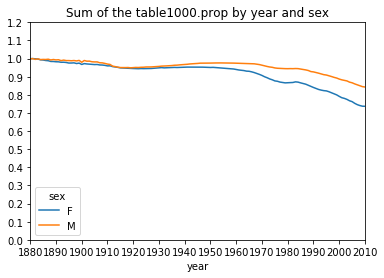

In [152]:
table.plot(title='Sum of the table1000.prop by year and sex', yticks=np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

#### 求前面多少个名字的人数加起来才够50%

In [158]:
df = boys[boys.year == 2010]
df
# 先计算prop的累计和cumsum，然后通过searchsorted方法找出0.3应该被插入在哪个位置才能保证不破坏顺序
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [159]:
prop_cumsum[0:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [160]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [161]:
# 由于书序索引是从0开始的，因为我们要给结果加1， 即最终结果为117
# 拿1990年的数据来比较，这个数字要小得多：
df = boys[boys.year == 1900] 

In [174]:
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()


In [173]:
in1990.searchsorted(0.5) + 1

array([25], dtype=int64)

In [185]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return (group.prop.cumsum().searchsorted(q) + 1)[0]
# 上面函数返回值需要加括号并取值，不然返回的是一个单值列表
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
      M       15
1883  F       39
      M       15
1884  F       39
      M       16
1885  F       40
      M       16
1886  F       41
      M       16
1887  F       41
      M       17
1888  F       42
      M       17
1889  F       43
      M       18
1890  F       44
      M       19
1891  F       44
      M       20
1892  F       44
      M       20
1893  F       44
      M       21
1894  F       45
      M       22
            ... 
1996  F      122
      M       64
1997  F      129
      M       67
1998  F      138
      M       70
1999  F      146
      M       73
2000  F      155
      M       77
2001  F      164
      M       81
2002  F      170
      M       83
2003  F      178
      M       87
2004  F      191
      M       92
2005  F      199
      M       96
2006  F      209
      M       99
2007  F      223
      M      103
2008  F      234
      M      109
2009  F      241
    

In [186]:
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


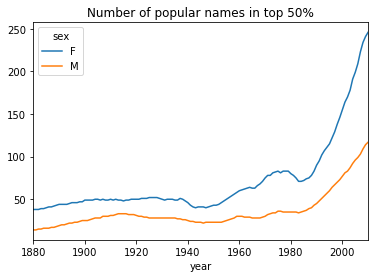

In [188]:
diversity.plot(title='Number of popular names in top 50%')  
# diversity

### 最后一个字母的变革

In [190]:
# 将全部出生数据在年度、性别以及末字母上进行聚合
# 从name列取出最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [191]:
# 选出具有代表性的三年，并输出前几行
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [192]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [193]:
# 按出生数对表进行规范化处理，以便计算各性别各末字母占总出生人数的比例
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [194]:
letter_prop = subtable / subtable.sum().astype(float)

In [196]:
import matplotlib.pyplot as ply

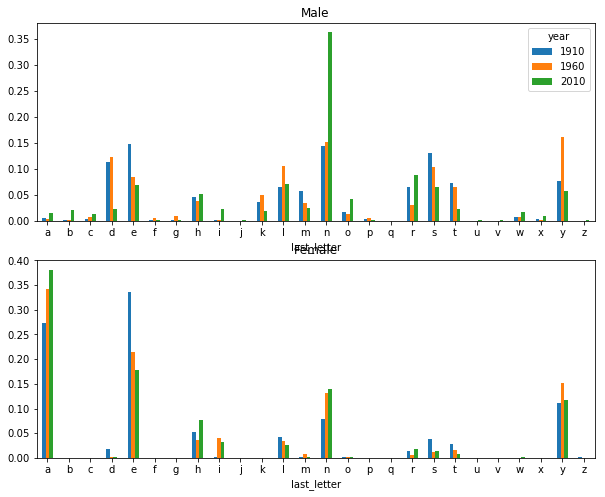

In [197]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax =axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax =axes[1], title='Female', legend=False)

In [198]:
letter_prop = table /table.sum().astype(float)

In [199]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [200]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


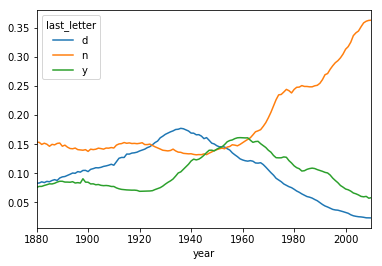

In [201]:
dny_ts.plot()

###  变成女孩名字的男孩名字（以及相反的情况）

In [202]:
# 找出以lesl开头的一组名字：
all_names= top1000.name.unique()

In [203]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [205]:
lesley_like = all_names[mask]

In [207]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [208]:
# 利用这个结果过滤其他的名字，并按名字分子计算出生数以查看相对频率：
filtered = top1000[top1000.name.isin(lesley_like)]

In [209]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [210]:
# 按性别和年度进行聚合，并按年度进行规范化处理
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [211]:
table = table.div(table.sum(1), axis = 0)

In [212]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


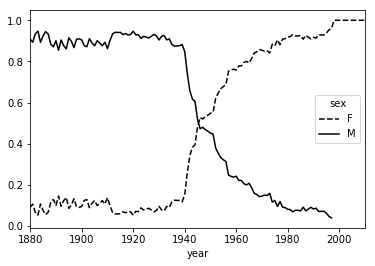

In [213]:
table.plot(style={'M':'k-',  'F':'k--'})

# 结束